<a href="https://colab.research.google.com/github/victorteodoro/projeto-aplicado-ii/blob/main/Programa_para_aquisi%C3%A7%C3%A3o_e_armazenamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segurança

**Antes de iniciar** o programa abaixo usa token e senha de acesso ftp que não são públicos. Para garantir que apenas os envolvidos tenham acesso às funcionalidades com essas informações restritas, use a **chave de acesso** disponibilizada no material entregue pelo Canvas.

In [1]:
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.kdf.scrypt import Scrypt
from cryptography.fernet import Fernet, InvalidToken
import base64
import json
import getpass

CKEY = getpass.getpass('Digite a chave de acesso: ')
encrypted = "gAAAAABl-JFHOqDe8JpOu-c5PttN_bSVAaX7bGzl4u_TasMasiYT9KlTpfniKwtieOSRmVByjGa-uq5b_LOQNr17s8-TasKtREMuFpuN7kBLs-f8lSu6VLa2TnP7uK1a4Ho0k8qm8BANJxuruXNvrCQltGCzR7AR0iUVSgoijFK7p4n-mntq45oCU-_1JPQCYNI9wmQ5wHYM3PevcBNvkr_uZxyXV7ZpJk2bM7uDXFUcDu-rZppTCSZXNBhHUSaIS9mAFmAflz6r7xnTBG4HdEr0jJyFXzUSfOzZFbh01WwBV173cDuF9UKOXFeTpU_g1i7VRnChUYevIezQKrbD-pHWQx_iVh5naU-HwpC0VhKV0toC5peH1BSDP1Opir8oViw2ue0SypBMemn893T8JTmTg-waaiQc7S5eeLuul-x8C4QcoEFrc-ixw5UtDUKtWqnFmw_-9gi32PifnTVXhW54Y2vhuOnuZQD1bNvXbzwhHQUUz2KV2LC77wOgqW4VkRBAuxGrRAZMQJKjUJUQTi5Ajn4B6RUI5iD9NkOeHYEhS15V3X5fAbLzCVS8LQ2gQhd5DxjfqyCvw8S7W6D1HTUJxmH47ra22ZBmCo_ic5KOTBcRGi_QRx0Bv6LVcZn_LRVxO1UMv6aPvB03QyQx9REl7CoKrX3A_K0zI6X9RnHh65jZrdLds55qeovHYMQFjA1xqGuIkTPkYKYFd5Vy907RX43-maHgbiRq7U5dB6jpXNELwJPk8qjVVwCNiRU-SYnpQHtZ5cyLLG-sMzPl-WJSYc7x5uQ5yXRytz8TbGEHvTumj_Gqhivv360Ul4FJxxcSK8zUxmKn9wXj4JYb3eOnRDnCnKYL9QWqXYj9NMulYXKlZDYKzbDUauSyAg1G1iAqE_P9qHkQIamwyQxrgWJp2EDsDWNclkFjujz9v-aduiU8Vsx5KZbqdVJjL1IhgHSgqroMibY8-p1-E0f4HZpiUgE_etSuYIdK2rzgj4c5GtXZ_plcg0BFBhFqhQKe1QSh13LNuStTlMUp981QcV_pRDWe9hAj7zJ_2CyXfUVnyyvUj9duhQQrgT_7PLRE_FNqAvp_i4AfaJZZZrz_uqiu04SW7CHRPibMI9ivJ4_qFwn8-zOlTxLqSECFVQuOZ3DfNLV3IVYYqtjcWX9XkqjhizrAfN_lvf5OZY3D3eQ0_r1QeeOrgs9LEz8MibzfqV2ncPtoqWTRVEmvjpsRJ1K30dmwy9lnAi029seswhWBgw42Iz4k798-hEreqDorocOE0Z3Pte8kJs6lFdpTdU-whADdix_BwY4u1zOvB2msHPQs49YMRXdR1hO3fp-KP0W2wmi_HMvRX5MefC950xITwNCnr7xgCnZNLv75Klmxzo5m5IyzSvjkMg9IVBvo4gmRQAMl3jxRnzd9j0yS7sMqsbJKU8aSqKcs2VR49x6SAZ_ErjiI1q-PoT5Bzs8uHle__JOIU3Bubdli75JG_Qz1sxh4AXOlUZRtHW9W149rfLC3R-nXVgyioaEzT2pekRehe94fhqyRC72KSvL9vnqDZNXK71GzyLQx7X-tGtKdQZAmYw9XexVV-aGV0TfGt_Dwjb8okL9Vu7xoIpl854IxOi2VyWTkG-56KcLolnYkfquXKMVT2drj13YM85D0OQziFOYUc_YHvhNCFu5ZNXy4st9xNFIrjDSt5UhncbddORhSM-_PBmoj_n5udz6yEVocgf9Zdu1clfWfbuz6mjsPwOHtYpdh5XVacw8y6AW7lHXZqC50P1hz4ISInEhEgIvJ2SoqG2uYNja89qXKsCblMwqTMUm44MQvJyI_rkwk9JUKKjsVA_FGOrCnCdWjw-_0YGLyRLlTSkBaQANJcmkRIpGG_g_cxM9nnkKssTh1KHMivKdE8ZLdcW_6IjD6Wgi9orHQ4RmtwAQ3Yc2WZJRv-Y-xoOPEcp2ljYOHG6lMYVMAWdqo-fQjpFFsoEW4ChQOOdsq0ddjK9CuWnGt7AiueieniFZI5BjZtYMtdmSgQtpuGHNZQEptGFjxhbP0yNXiFvU3zOb78UMC4ww1-YJ82rNhHkDsEDrqy6TgxaNU7jTyhQpJiLjh5lSXGZfyonu8_DW3vkzSnA0Dd6qoeyqaikXrU_sXEEs0mDZkbj1DyfKtMUVcEO8cqBPzAk3yGg8s8M5lWYWbGzH46rEqQrAqE5MmdqpwCGalGBgn4O_R6kdLTb_bcTKEiOqYSeSd5HipjuMuE7lU-WOYyLb_CheZu3pzQN7fvAx8RyuBYF-J1ZqQiH3ByAmnfBg5tvKPF4c0lXv9jRTwF8z7S1cMpWEm9ADGmB7OVkRj5MMmZJfHlnPV5wGsz0a8KKYhbb3ZsPG1mSA3Hjg2zhuleIJyUIEUQqjRtTI43TgWO0yoVGnMytN49KM5U0ok4oRcAWK7tb-Mn9OPgPZE7Qe3JDKoOzM-kdvL-moShRgenOzinPNELpBYFI9YqeykFV2cooBtb9-6RIx6e976D1pAaHwMnjWkXUeZx3orx_uDsh8kv4ov0AAQI9jcTo5p6ZEyogozLK-OaNxAY-WF1bBZcvFzzMzdqiDlpOgc2wTgRs22JTHBiIgXfPQOiVFFs_gRageirISNqZaS5gS3d6upG-v5o3YfVDsLBIRY4yH3SncqSx4o1rS2nibBC0GQ31ov-tg2mmDlHulpZCfcXnaIJzd3ajN5z4nBES1CVX1Gok_PGXECn_zxO1QMSx0iq26QyctoHfyDvUn0SsbkiAQujnF3gIhvuSR07t661NG0e-JptISl9iV_lpf-Neyk05dgKBE3B4yVu6adakAd32XaIQSlqHVbVqxRCAYI6EWNC4MkizfYo_ipNcmCcA_5FR5-IsASUwgbzexNQ58p5mGNNQ0R0BoYmLGZM__P4cxrhsTSIxsdK6k76nvQFEoK5SQHAxekyNJn8JWb1JOrl_e8o1l6jmdVsZPZatU-gdQQuwZw5OzQN9yJl_sDOHQsmc7X6b7DBhkS_TzvttrJepZd-Sd64ljGlL6VON3soPlyHQ43gxPPhZdpwRxraxXIeVo4QbExa_2lNVil6BE14VGRMs3HvYPlD5UkUFrwUD46TvnU54U7uVpZIstCzVjBgJ_cJuuEyD4t2DN0N9flV08zktovPTUKoYXEpGuFDYeBLLIKZImQze8RHig5maOE_g2qLxWTefE7L2ciqCo7ccbu621Mp72Xd85177qEBeQsVvNFgcDpoyhZTKQZQhk="

salt = b'salt_'  # Isso deve ser protegido e único para cada usuário
kdf = Scrypt(
    salt=salt,
    length=32,
    n=2**14,
    r=8,
    p=1,
    backend=default_backend()
)
key = base64.urlsafe_b64encode(kdf.derive(CKEY.encode()))  # Deriva uma chave segura
fernet = Fernet(key)

try:
    decrypted = fernet.decrypt(encrypted).decode()
    KEY = json.loads(decrypted)
    print("SUCESSO: A chave de decriptografia está correta!")
except InvalidToken:
    print("ERRO: A chave de decriptografia está incorreta!")

Digite a chave de acesso: ··········
SUCESSO: A chave de decriptografia está correta!


#Google Earth Engine

Inicie a sessão na api do GEE para carregar os mapas da nuvem.

Como resposta o código abaixo deve mostrar:

{'id': 'LANDSAT', 'name': 'projects/earthengine-public/assets/LANDSAT', 'type': 'FOLDER'}


In [2]:
from google.auth.transport.requests import AuthorizedSession
from google.oauth2 import service_account


credentials = service_account.Credentials.from_service_account_info(KEY)
scoped_credentials = credentials.with_scopes(
    ['https://www.googleapis.com/auth/cloud-platform'])

session = AuthorizedSession(scoped_credentials)

url = 'https://earthengine.googleapis.com/v1alpha/projects/earthengine-public/assets/LANDSAT'

response = session.get(url)

from pprint import pprint
import json
pprint(json.loads(response.content))


{'id': 'LANDSAT',
 'name': 'projects/earthengine-public/assets/LANDSAT',
 'type': 'FOLDER'}


#Classes do Projeto Carcará

O download e armazenamento das imagens são feitos pelas classes abaixo

In [6]:
import urllib
import ftplib
import math
import io
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from PIL import Image
from IPython.display import display
from datetime import datetime, timezone

class QuadroSatelite:
    def __init__(self, indice_lat, indice_lon, poligono, imagem=None):
        self.indice_lat = indice_lat
        self.indice_lon = indice_lon
        self.poligono = poligono
        self.imagem = imagem

        if imagem is None:
            self.carregado = False
        else:
            self.carregado = True

    def carregarImagem(self, imagem):
        self.imagem = imagem
        self.carregado = True
        return True

    def nome_do_arquivo(self):
        # Define os prefixos com base nos sinais de latitude e longitude
        pre_lat = "S" if self.indice_lat < 0 else "N"
        pre_lon = "O" if self.indice_lon < 0 else "L"

        # Converte os índices para hexadecimal e preenche com zeros à esquerda para ter 8 dígitos
        lat_hex = format(abs(self.indice_lat), '08x')
        lon_hex = format(abs(self.indice_lon), '08x')

        # Retorna a string concatenada
        return f"{pre_lat}{lat_hex}{pre_lon}{lon_hex}"

class ImagemSatelite:
    RAIO_TERRA = 6.3781e6 # em metros
    PERIM_TERRA = 2*math.pi*RAIO_TERRA
    quadros = pd.DataFrame(columns=['indice_lat', 'indice_lon', 'objeto', 'carregado', 'salvo'])

    def __init__(self, projeto, mapa_id, dados=None):
        self.projeto = projeto
        self.mapa_id = mapa_id
        if dados is None:
            display("Escala: "+str(self.carregar_escala(projeto, mapa_id))+" metros por pixel")
        else:
            self.data=dados['data']
            self.hora=dados['hora']
            self.escala=dados['escala']

    def carregar_escala(self, projeto, mapa_id):
        global session

        # Construindo o nome do recurso com base no projeto, asset_id e map_id fornecido
        name = f'{projeto}/assets/{mapa_id}'

        # Definindo a URL para acessar os metadados da imagem específica
        url = f'https://earthengine.googleapis.com/v1alpha/{name}'

        # Fazendo a requisição para obter os metadados da imagem
        response = session.get(url)

        # Verificando se a requisição foi bem-sucedida
        if response.status_code == 200:
            # Carregando o conteúdo da resposta
            content = json.loads(response.content)

            data = datetime.fromisoformat(content['endTime'].rstrip("Z")).replace(tzinfo=timezone.utc)
            self.data = data.strftime("%Y-%m-%d")
            self.hora = data.strftime("%H:%M:%S")

            # Extraindo a informação de 'bands' dos metadados
            if 'bands' in content:
                bands = pd.DataFrame(content['bands'])

                # Procurando a banda específica, por exemplo, 'B2'
                try:
                    # Encontrando a escala (metros por pixel) para a banda especificada
                    self.escala = [abs(bands[bands['id']=='B2']['grid'].iloc[0]['affineTransform']['scaleY']), abs(bands[bands['id']=='B2']['grid'].iloc[0]['affineTransform']['scaleX'])]
                    return self.escala
                except (KeyError, IndexError) as e:
                    print(f"Erro ao tentar acessar a escala da banda: {e}")
                    return None
            else:
                print("Informações de bandas não encontradas nos metadados.")
                return None
        else:
            print("Falha na requisição: ", response.status_code)
            return None

    def definir_quadro(self, altura, largura): # definindo o tamanho de cada imagem do mapa
        self.quadro=[altura, largura]

    def indice_da_latitude(self, latitude): # encontrar o índice da imagem pela latitude, sendo o equador=0
        return math.floor( latitude * self.PERIM_TERRA / 360 / self.escala[0] / self.quadro[0] )

    def latitude_media_do_indice(self, indice): # encontrar a latitude do centro do quadro
        return 360.0 * (indice+0.5) * self.escala[0] * self.quadro[0] / self.PERIM_TERRA

    def latitude_minima_do_indice(self, indice): # encontrar a latitude mínima do quadro
        return 360 * indice * self.escala[0] * self.quadro[0] / self.PERIM_TERRA

    def latitude_maxima_do_indice(self, indice): #encontrar a latitude máxima do quadro
        return self.latitude_minima_do_indice(indice+1)

    def longitude_na_latitude(self, latitude): # retorna o tamanho da linha longitudinal em metros
        return 2 * math.pi * self.RAIO_TERRA * math.cos(math.radians(latitude))

    def indice_da_longitude(self, longitude, indice_lat): # calcular o índice da imagem pela longitude, sendo greeenwich=0
        return math.floor( longitude * self.longitude_na_latitude(self.latitude_media_do_indice(indice_lat)) / 360 / self.escala[1] / self.quadro[1])

    def longitude_minima_do_indice(self, indice, longitude_metros):
        return 360 * indice * self.escala[1] * self.quadro[1] / longitude_metros

    def longitude_maxima_do_indice(self, indice, longitude_metros):
        return self.longitude_minima_do_indice(indice+1, longitude_metros)

    def indices_do_quadro(self, latitude, longitude): # calcular os índices de um quadro dado as coordenadas
        indice_lat = self.indice_da_latitude(latitude)
        indice_lon = self.indice_da_longitude(longitude, indice_lat)
        return [indice_lat, indice_lon]

    def poligono_do_quadro(self, indice_lat, indice_lon):
        min_lat = self.latitude_minima_do_indice(indice_lat)
        max_lat = self.latitude_maxima_do_indice(indice_lat)
        longitude_metros = self.longitude_na_latitude(self.latitude_media_do_indice(indice_lat))
        min_lon = self.longitude_minima_do_indice(indice_lon, longitude_metros)
        max_lon = self.longitude_maxima_do_indice(indice_lon, longitude_metros)

        return {'type': 'Polygon',
              'coordinates': [[[min_lon, min_lat],
                              [max_lon, min_lat],
                              [max_lon, max_lat],
                              [min_lon, max_lat],
                              [min_lon, min_lat]]]}

    def area_do_poligono(self, poligono):
        min_lat = poligono["coordinates"][0][0][1]
        max_lat = poligono["coordinates"][0][0][1]
        min_lon = poligono["coordinates"][0][0][0]
        max_lon = poligono["coordinates"][0][0][0]
        for coord in poligono["coordinates"][0]:
          if coord[0]<min_lon:
            min_lon=coord[0]
          if coord[0]>max_lon:
            max_lon=coord[0]
          if coord[1]<min_lat:
            min_lat=coord[1]
          if coord[1]>max_lat:
            max_lat=coord[1]
        return [min_lat,max_lat,min_lon,max_lon]

    def gerar_quadro_pela_localizacao(self, latitude, longitude):
        indices = self.indices_do_quadro( latitude, longitude )
        result = self.quadros[(self.quadros['indice_lat'] == indices[0]) & (self.quadros['indice_lon'] == indices[1])]

        if result.empty:
            poligono = self.poligono_do_quadro( indices[0], indices[1] )
            quadro = QuadroSatelite( indices[0], indices[1], poligono )

            self.quadros = pd.concat([ self.quadros , pd.DataFrame([{ "indice_lat":indices[0], "indice_lon":indices[1], "objeto":quadro, "carregado":False, "salvo":False }]) ], ignore_index=True)

        return indices

    def gerar_quadro_pelos_indices(self, indice_lat, indice_lon):
        indices = [ indice_lat, indice_lon ]
        result = self.quadros[(self.quadros['indice_lat'] == indices[0]) & (self.quadros['indice_lon'] == indices[1])]

        if result.empty:
            poligono = self.poligono_do_quadro( indices[0], indices[1] )
            quadro = QuadroSatelite( indices[0], indices[1], poligono )

            self.quadros = pd.concat([ self.quadros , pd.DataFrame([{ "indice_lat":indices[0], "indice_lon":indices[1], "objeto":quadro, "carregado":False, "salvo":False }]) ], ignore_index=True)

        return indices

    def retornar_objeto_pelos_indices(self, indice_lat, indice_lon):
        result = self.quadros[(self.quadros['indice_lat'] == indice_lat) & (self.quadros['indice_lon'] == indice_lon)]

        if not result.empty:
            return result.iloc[0]['objeto']
        else:
            return None

    def carregar_quadro(self, indice_lat, indice_lon):
        global session

        objeto = self.retornar_objeto_pelos_indices( indice_lat, indice_lon )

        if objeto is None:
          return False

        if objeto.carregado==True:
          return True

        name = '{}/assets/{}'.format(self.projeto, self.mapa_id)

        url = 'https://earthengine.googleapis.com/v1alpha/{}:getPixels'.format(name)
        body = json.dumps({
            'fileFormat': 'PNG',
            'bandIds': ['B4', 'B3', 'B2'],
            'region': objeto.poligono,
            'grid': {
                'dimensions': {'width': self.quadro[1], 'height': self.quadro[0]},    # Tamanho da imagem baixada
            },
            'visualizationOptions': {
                'ranges': [{'min': 0, 'max': 3000}],
            },
        })

        image_response = session.post(url, body)
        image_content = image_response.content

        buffer = io.BytesIO(image_content)  # Cria um buffer com o conteúdo da imagem
        image = Image.open(buffer)  # Cria um objeto de imagem PIL a partir do buffer

        if objeto.carregarImagem(image):
            self.quadros.loc[(self.quadros['indice_lat'] == indice_lat) & (self.quadros['indice_lon'] == indice_lon), 'carregado'] = True
            return True
        else:
            return False

    def indices_da_area( self, min_lat, max_lat, min_lon, max_lon ):
        indices = []
        indice_lat_min = self.indice_da_latitude(min_lat)
        indice_lat_max = self.indice_da_latitude(max_lat)
        for indice_lat in range(indice_lat_min, indice_lat_max+1):
            indice_lon_min = self.indice_da_longitude(min_lon, indice_lat)
            indice_lon_max = self.indice_da_longitude(max_lon, indice_lat)
            for indice_lon in range(indice_lon_min, indice_lon_max+1):
                indices.append( [indice_lat, indice_lon] )
        return indices

    def area_em_pixeis( self, min_lat, max_lat, min_lon, max_lon ):
        lat_em_m = self.PERIM_TERRA*(max_lat-min_lat)/360
        lon_em_m = self.longitude_na_latitude((max_lat+min_lat)/2)*(max_lon-min_lon)/360

        return [round(lon_em_m/self.escala[0]), round(lat_em_m/self.escala[1])]

    def preverMapa( self, min_lat, max_lat, min_lon, max_lon, max_tamanho=800 ):
        global session
        tam = self.area_em_pixeis(min_lat,max_lat,min_lon,max_lon)
        if tam[0]>tam[1]:
          if tam[0]>max_tamanho:
            tam[1]=round(max_tamanho*tam[1]/tam[0])
            tam[0]=max_tamanho
        else:
          if tam[1]>max_tamanho:
            tam[0]=round(max_tamanho*tam[0]/tam[1])
            tam[1]=max_tamanho

        name = '{}/assets/{}'.format(self.projeto, self.mapa_id)

        url = 'https://earthengine.googleapis.com/v1alpha/{}:getPixels'.format(name)
        body = json.dumps({
            'fileFormat': 'PNG',
            'bandIds': ['B4', 'B3', 'B2'],
            'region': {'type': 'Polygon',
              'coordinates': [[[min_lon, min_lat],
                              [max_lon, min_lat],
                              [max_lon, max_lat],
                              [min_lon, max_lat],
                              [min_lon, min_lat]]]},
            'grid': {
                'dimensions': {'width': tam[0], 'height': tam[1]},    # Tamanho da imagem baixada
            },
            'visualizationOptions': {
                'ranges': [{'min': 0, 'max': 3000}],
            },
        })

        image_response = session.post(url, body)
        image_content = image_response.content

        buffer = io.BytesIO(image_content)  # Cria um buffer com o conteúdo da imagem
        imagem = Image.open(buffer)  # Cria um objeto de imagem PIL a partir do buffer

        display(imagem)
        return imagem

    def visualizarMapa( self, min_lat, max_lat, min_lon, max_lon, max_tamanho=800 ):
        tam = self.area_em_pixeis(min_lat,max_lat,min_lon,max_lon)
        if tam[0]>tam[1]:
          if tam[0]>max_tamanho:
            tam[1]=round(max_tamanho*tam[1]/tam[0])
            tam[0]=max_tamanho
        else:
          if tam[1]>max_tamanho:
            tam[0]=round(max_tamanho*tam[0]/tam[1])
            tam[1]=max_tamanho
        imagem = Image.new("RGBA", (tam[0],tam[1]), (0,0,0,0))
        quadros = self.quadros.loc[(self.quadros["carregado"] == True)]
        for indice, quadro in quadros.iterrows():
          quadro=quadro["objeto"]
          area=self.area_do_poligono(quadro.poligono)
          min_y=round((area[0]-min_lat)*tam[1]/(max_lat-min_lat))
          max_y=round((area[1]-min_lat)*tam[1]/(max_lat-min_lat))
          min_x=round((area[2]-min_lon)*tam[0]/(max_lon-min_lon))
          max_x=round((area[3]-min_lon)*tam[0]/(max_lon-min_lon))
          tam_x=max_x-min_x
          tam_y=max_y-min_y
          redimensionada = quadro.imagem.resize((tam_x,tam_y))
          imagem.paste(redimensionada,(min_x,tam[1]-max_y))
        display(imagem)
        return imagem

class ProjetoCarcara:
      mapa_atual = None
      def __init__(self, nome_da_pasta, nome_do_projeto=None, ftp=None, gee_sessao=None):
        self.ftp = ftp
        self.gee_sessao = gee_sessao
        if ftp is not None and nome_do_projeto is None:
            self.carregar_arquivo(nome_da_pasta, ftp)
        else:
            self.novo_projeto(nome_da_pasta, nome_do_projeto, ftp)

      def salvar_dados_de_novo_projeto(self):
        self.ftp.mkd( self.nome_da_pasta )
        self.ftp.mkd( f"{self.nome_da_pasta}/galeria" )
        self.ftp.mkd( f"{self.nome_da_pasta}/modelo" )

        buffer = io.BytesIO(json.dumps({"nome_do_projeto": self.nome_do_projeto}).encode('utf-8'))
        ftp.storbinary(f'STOR {self.nome_da_pasta}/dados.json', buffer)

        self.galeria.drop(columns=["objeto"]).to_csv("galeria.csv", index=False)
        with open("galeria.csv", 'rb') as file:
            self.ftp.storbinary(f'STOR {nome_da_pasta}/galeria.csv', file)

      def novo_projeto(self, nome_da_pasta, nome_do_projeto, ftp):
        self.nome_do_projeto = nome_do_projeto
        self.nome_da_pasta = nome_da_pasta
        self.galeria = pd.DataFrame( columns=["projeto", "mapa_id", "data", "hora", "resolução_x", "resolução_y", "objeto"] )

        if ftp is not None:
            self.ftp = ftp
            self.salvar_dados_do_novo_projeto()

        else:
            self.ftp = None

      def carregar_arquivo(self, nome_da_pasta, ftp):
          self.nome_da_pasta = nome_da_pasta
          if ftp is not None:
              # Cria um objeto BytesIO para ler 'dados.json'
              with io.BytesIO() as mem_file_json:
                  # Lê 'dados.json' do servidor FTP para a memória
                  ftp.retrbinary(f'RETR {nome_da_pasta}/dados.json', mem_file_json.write)
                  mem_file_json.seek(0)  # Posiciona no início do arquivo em memória
                  data = json.load(mem_file_json)  # Carrega o JSON em memória

              # Atualiza o nome do projeto com base nos dados carregados
              self.nome_do_projeto = data["nome_do_projeto"]

              # Cria um novo objeto BytesIO para ler 'galeria.csv'
              with io.BytesIO() as mem_file_csv:
                  # Lê 'galeria.csv' do servidor FTP para a memória
                  ftp.retrbinary(f'RETR {nome_da_pasta}/galeria.csv', mem_file_csv.write)
                  mem_file_csv.seek(0)  # Posiciona no início do arquivo em memória
                  self.galeria = pd.read_csv(mem_file_csv)  # Carrega o CSV em um DataFrame
                  self.galeria["objeto"] = None

      def adicionar_ftp(self, ftp):
        if self.ftp is None:
            self.ftp = ftp
            self.salvar_dados_do_novo_projeto()

      def adicionar_gee_sessao(self, gee_sessao):
        self.gee_sessao = gee_sessao

      def adicionar_mapa(self, mapa):
        if(self.galeria[self.galeria["mapa_id"]==mapa.mapa_id].shape[0]>0):
            return False
        self.galeria = pd.concat([self.galeria, pd.DataFrame([{"projeto": mapa.projeto, "mapa_id": mapa.mapa_id, "data": mapa.data, "hora": mapa.hora, "resolução_x": mapa.escala[0], "resolução_y": mapa.escala[1], "objeto": mapa}])])
        return True

      def salvar_dados_do_projeto(self):
        if self.ftp is not None:
            buffer = io.BytesIO(json.dumps({"nome_do_projeto": self.nome_do_projeto}).encode('utf-8'))
            self.ftp.storbinary(f'STOR {self.nome_da_pasta}/dados.json', buffer)

            self.galeria.drop(columns=["objeto"]).to_csv("galeria.csv", index=False)
            with open("galeria.csv", 'rb') as file:
                self.ftp.storbinary(f'STOR {self.nome_da_pasta}/galeria.csv', file)

      def salvar_dados_do_mapa(self, mapa_id):
        mapa = self.galeria[self.galeria["mapa_id"]==mapa_id].iloc[0]['objeto']
        mapa_id = str.replace(mapa.mapa_id, "/", "+")
        try:
            self.ftp.cwd( f"{self.nome_da_pasta}/galeria/{mapa_id}" )
        except ftplib.error_perm:
            self.ftp.mkd( f"{self.nome_da_pasta}/galeria/{mapa_id}" )

        self.ftp.cwd("/")

        buffer = io.BytesIO(json.dumps({"projeto": mapa.projeto, "mapa_id": mapa.mapa_id, "data": mapa.data, "hora": mapa.hora, "escala": mapa.escala, "quadro": mapa.quadro}).encode('utf-8'))
        self.ftp.storbinary(f'STOR {self.nome_da_pasta}/galeria/{mapa_id}/dados.json', buffer)

        mapa.quadros.drop(columns=["objeto","carregado"]).to_csv("quadros.csv", index=False)
        with open("quadros.csv", 'rb') as file:
            self.ftp.storbinary(f'STOR {self.nome_da_pasta}/galeria/{mapa_id}/quadros.csv', file)

      def carregar_dados_do_mapa(self, mapa_id):
        mapa_pasta = str.replace(mapa_id, "/", "+")
        if self.ftp is not None:
              # Cria um objeto BytesIO para ler 'dados.json'
              with io.BytesIO() as mem_file_json:
                  # Lê 'dados.json' do servidor FTP para a memória
                  self.ftp.retrbinary(f'RETR {self.nome_da_pasta}/galeria/{mapa_pasta}/dados.json', mem_file_json.write)
                  mem_file_json.seek(0)  # Posiciona no início do arquivo em memória
                  dados = json.load(mem_file_json)  # Carrega o JSON em memória

              imagem = ImagemSatelite(dados['projeto'],dados['mapa_id'],dados)
              if dados['quadro'] is not None:
                  imagem.definir_quadro(dados['quadro'][0],dados['quadro'][1])

              # Cria um novo objeto BytesIO para ler 'galeria.csv'
              with io.BytesIO() as mem_file_csv:
                  # Lê 'galeria.csv' do servidor FTP para a memória
                  self.ftp.retrbinary(f'RETR {self.nome_da_pasta}/galeria/{mapa_pasta}/quadros.csv', mem_file_csv.write)
                  mem_file_csv.seek(0)  # Posiciona no início do arquivo em memória
                  imagem.quadros = pd.read_csv(mem_file_csv)  # Carrega o CSV em um DataFrame
                  imagem.quadros["objeto"] = imagem.quadros.apply(lambda row: QuadroSatelite(row["indice_lat"], row["indice_lon"], imagem.poligono_do_quadro(row["indice_lat"], row["indice_lon"])), axis=1)
                  imagem.quadros["carregado"] = False

              self.galeria.loc[self.galeria["mapa_id"]==mapa_id, "objeto"] = imagem

      def salvar_quadros_do_mapa(self, mapa_id):
          mapa_pasta = mapa_id.replace("/", "+")
          mapa = self.galeria[self.galeria["mapa_id"] == mapa_id].iloc[0]['objeto']

          if self.ftp is not None:
              condicao = (mapa.quadros["carregado"] == True) & (mapa.quadros["salvo"] == False)
              quadros = mapa.quadros.loc[condicao]

              for indice, quadro in quadros.iterrows():
                  if quadro["carregado"]:
                      arquivo = quadro["objeto"].nome_do_arquivo()
                      buffer = io.BytesIO()  # Cria um buffer em memória para a imagem
                      quadro["objeto"].imagem.save(buffer, format='PNG')  # Salva a imagem no buffer como PNG
                      buffer.seek(0)  # Retorna ao início do buffer para garantir que a leitura dos bytes comece do início

                      # Agora, buffer contém a representação em bytes da imagem, pronto para ser enviado via FTP
                      path = f'{self.nome_da_pasta}/galeria/{mapa_pasta}/{arquivo}.png'
                      if self.ftp.storbinary(f'STOR {path}', buffer):
                          idx = quadro.name  # 'name' contém o índice da linha original no DataFrame 'mapa.quadros'
                          mapa.quadros.loc[idx, "salvo"] = True


      def carregar_quadros_salvos_do_mapa(self, mapa_id):
          mapa_pasta = mapa_id.replace("/", "+")
          mapa = self.galeria[self.galeria["mapa_id"] == mapa_id].iloc[0]['objeto']

          if self.ftp is not None:
              condicao = (mapa.quadros["carregado"] == False) & (mapa.quadros["salvo"] == True)
              quadros = mapa.quadros.loc[condicao]

              for indice, quadro in quadros.iterrows():
                  if not quadro["carregado"]:
                      arquivo = quadro["objeto"].nome_do_arquivo()
                      path = f'{self.nome_da_pasta}/galeria/{mapa_pasta}/{arquivo}.png'
                      with io.BytesIO() as buffer:
                          self.ftp.retrbinary(f'RETR {path}', buffer.write)
                          buffer.seek(0)  # Volta ao início do buffer
                          quadro["objeto"].carregarImagem(Image.open(buffer).copy())

                      idx = quadro.name  # 'name' contém o índice da linha original no DataFrame 'mapa.quadros'
                      mapa.quadros.loc[idx, "carregado"] = True

      def abrirMapa(self, mapa_id, carregar_quadros=True):
        self.carregar_dados_do_mapa(mapa_id)
        if carregar_quadros:
          self.carregar_quadros_salvos_do_mapa(mapa_id)
        self.mapa_atual = mapa_id
        return self.galeria[self.galeria["mapa_id"]==self.mapa_atual].iloc[0]["objeto"]

      def novoMapa(self, projeto, mapa_id, quadro=None):
        imagem = ImagemSatelite(projeto, mapa_id)
        if quadro is not None:
          imagem.definir_quadro(quadro[0],quadro[1])
        self.adicionar_mapa(imagem)
        self.mapa_atual = mapa_id
        return self.galeria[self.galeria["mapa_id"]==self.mapa_atual].iloc[0]["objeto"]

      def salvarMapa(self):
        if self.mapa_atual is not None:
          self.salvar_quadros_do_mapa(self.mapa_atual)
          self.salvar_dados_do_mapa(self.mapa_atual)

      def mapaAtual(self):
        if self.mapa_atual is not None:
          return self.galeria[self.galeria["mapa_id"]==self.mapa_atual].iloc[0]["objeto"]

      def carregarArea(self, min_lat, max_lat, min_lon, max_lon, carregar=True):
        if self.mapa_atual is not None:
          mapa = self.galeria[self.galeria["mapa_id"]==self.mapa_atual].iloc[0]["objeto"]
          area = mapa.indices_da_area(min_lat, max_lat, min_lon, max_lon)
          for quadro in area:
            mapa.gerar_quadro_pelos_indices(quadro[0], quadro[1])
          if carregar:
            for quadro in area:
              mapa.carregar_quadro(quadro[0], quadro[1])

# Acessando o projeto

Vamos acessar o projeto já iniciado pelo FTP

In [7]:
projeto = ProjetoCarcara("2024-1-agua-e-vida-stl", ftp=ftplib.FTP("ftp.asav.com.br", "datascience@asav.com.br", CKEY), gee_sessao=session)
imagem = projeto.abrirMapa("COPERNICUS/S2/20240126T131241_20240126T131236_T23KNS") # imagem de satélite baixada

*Passo 1 -* Usando **preverMapa** podemos visualizar a área do mapa desejada do GEE antes de baixá-la de fato. Desta forma economizamos dados do GEE.

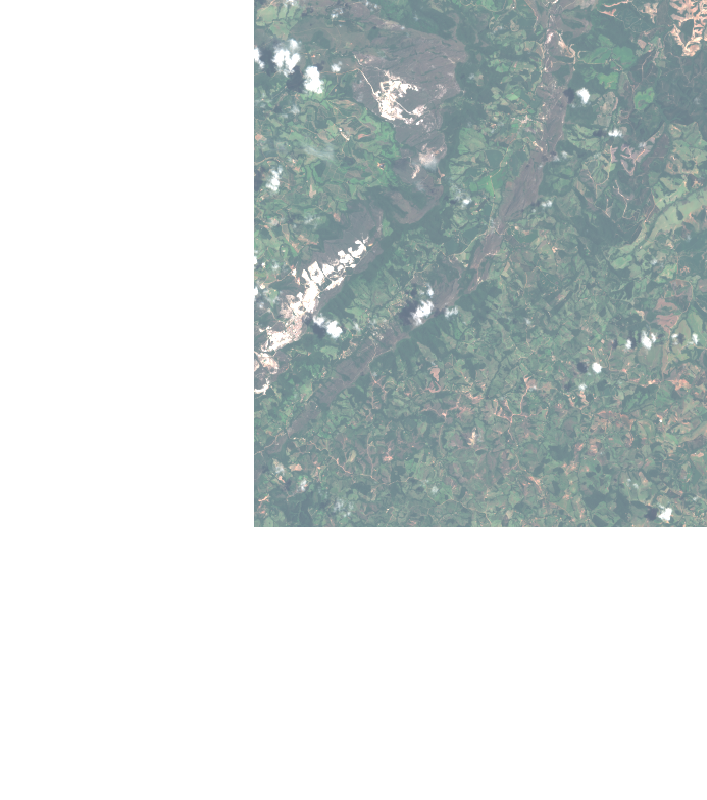

In [8]:
img = imagem.preverMapa(-21.88779, -21.60614, -45.09643, -44.82858) # Os limites de São Thomé das Letras - MG

*Passo 2 -* Com **carregarArea** baixamos todos os quadros do mapa dentro da área especificada. Use o quinto parâmetro da função como False para apenas listar todos os quadros sem carragá-los do GEE, assim podemos prever a quantidade de quadros sem usar dados sem necessidade.

In [9]:
#projeto.carregarArea(-21.88779, -21.60614, -45.09643, -44.82858) # toda São Tomé
display(imagem.quadros)

,indice_lat,indice_lon,salvo,objeto,carregado
0,-604,-1161,True,<__main__.QuadroSatelite object at 0x7f46bec73...,True
1,-605,-1164,True,<__main__.QuadroSatelite object at 0x7f46bec72...,True
2,-605,-1163,True,<__main__.QuadroSatelite object at 0x7f46bec72...,True
3,-605,-1162,True,<__main__.QuadroSatelite object at 0x7f46bec73...,True
4,-605,-1161,True,<__main__.QuadroSatelite object at 0x7f46bec73...,True
...,...,...,...,...,...
67,-603,-1166,True,<__main__.QuadroSatelite object at 0x7f46bec71...,True
68,-603,-1165,True,<__main__.QuadroSatelite object at 0x7f46bec71...,True
69,-602,-1167,True,<__main__.QuadroSatelite object at 0x7f46bec70...,True
70,-602,-1166,True,<__main__.QuadroSatelite object at 0x7f46bec72...,True


*Passo 3 -* Para ver como está o mapa baixado juntando todos os quadros em uma única imagem use **visualizarMapa**. O quinto parâmetro é por padrão 800, que representa o tamanho máximo da imagem em pixeis, para visualizá-la maior basta aumentar este parâmetro.

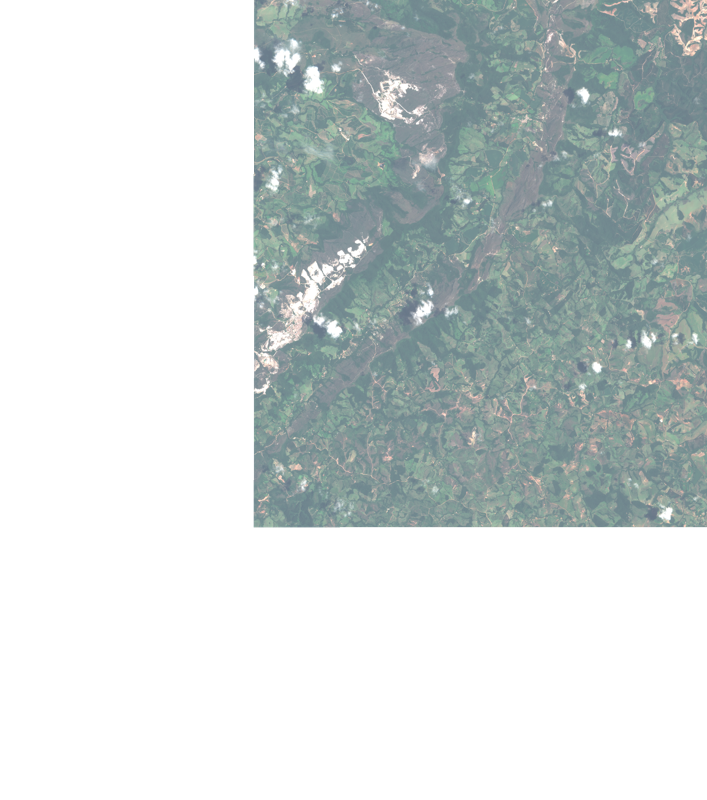

In [10]:
img=imagem.visualizarMapa(-21.88779, -21.60614, -45.09643, -44.82858)

*Passo 4 -* Se fez alterações no mapa, você deve salvá-las usando **salvarMapa**.

In [11]:
#projeto.salvarMapa()